In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head() #データの観察を行う

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# データ数の確認
print(data.shape)

(1460, 81)


In [4]:
# 変数の確認
# len(data.columns)
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


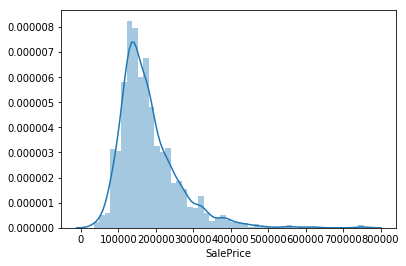

In [6]:
sns.distplot(data["SalePrice"])
plt.show()

In [7]:
# data.info()
# 欠損値の確認
data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [9]:
#欠損値の多いものは削除
data = data.drop(columns=["PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage","LotFrontage"])

In [10]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(data.shape[1]):
    if data.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(data.iloc[:,i].values))
        data.iloc[:,i] = lbl.transform(list(data.iloc[:,i].values))
     

In [11]:
# 平均値補完
data=data.fillna(data.mean())

In [12]:
data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [13]:
X = data.loc[:,data.columns != "SalePrice"]
y= data.loc[:,["SalePrice"]]

In [14]:
# データセットの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

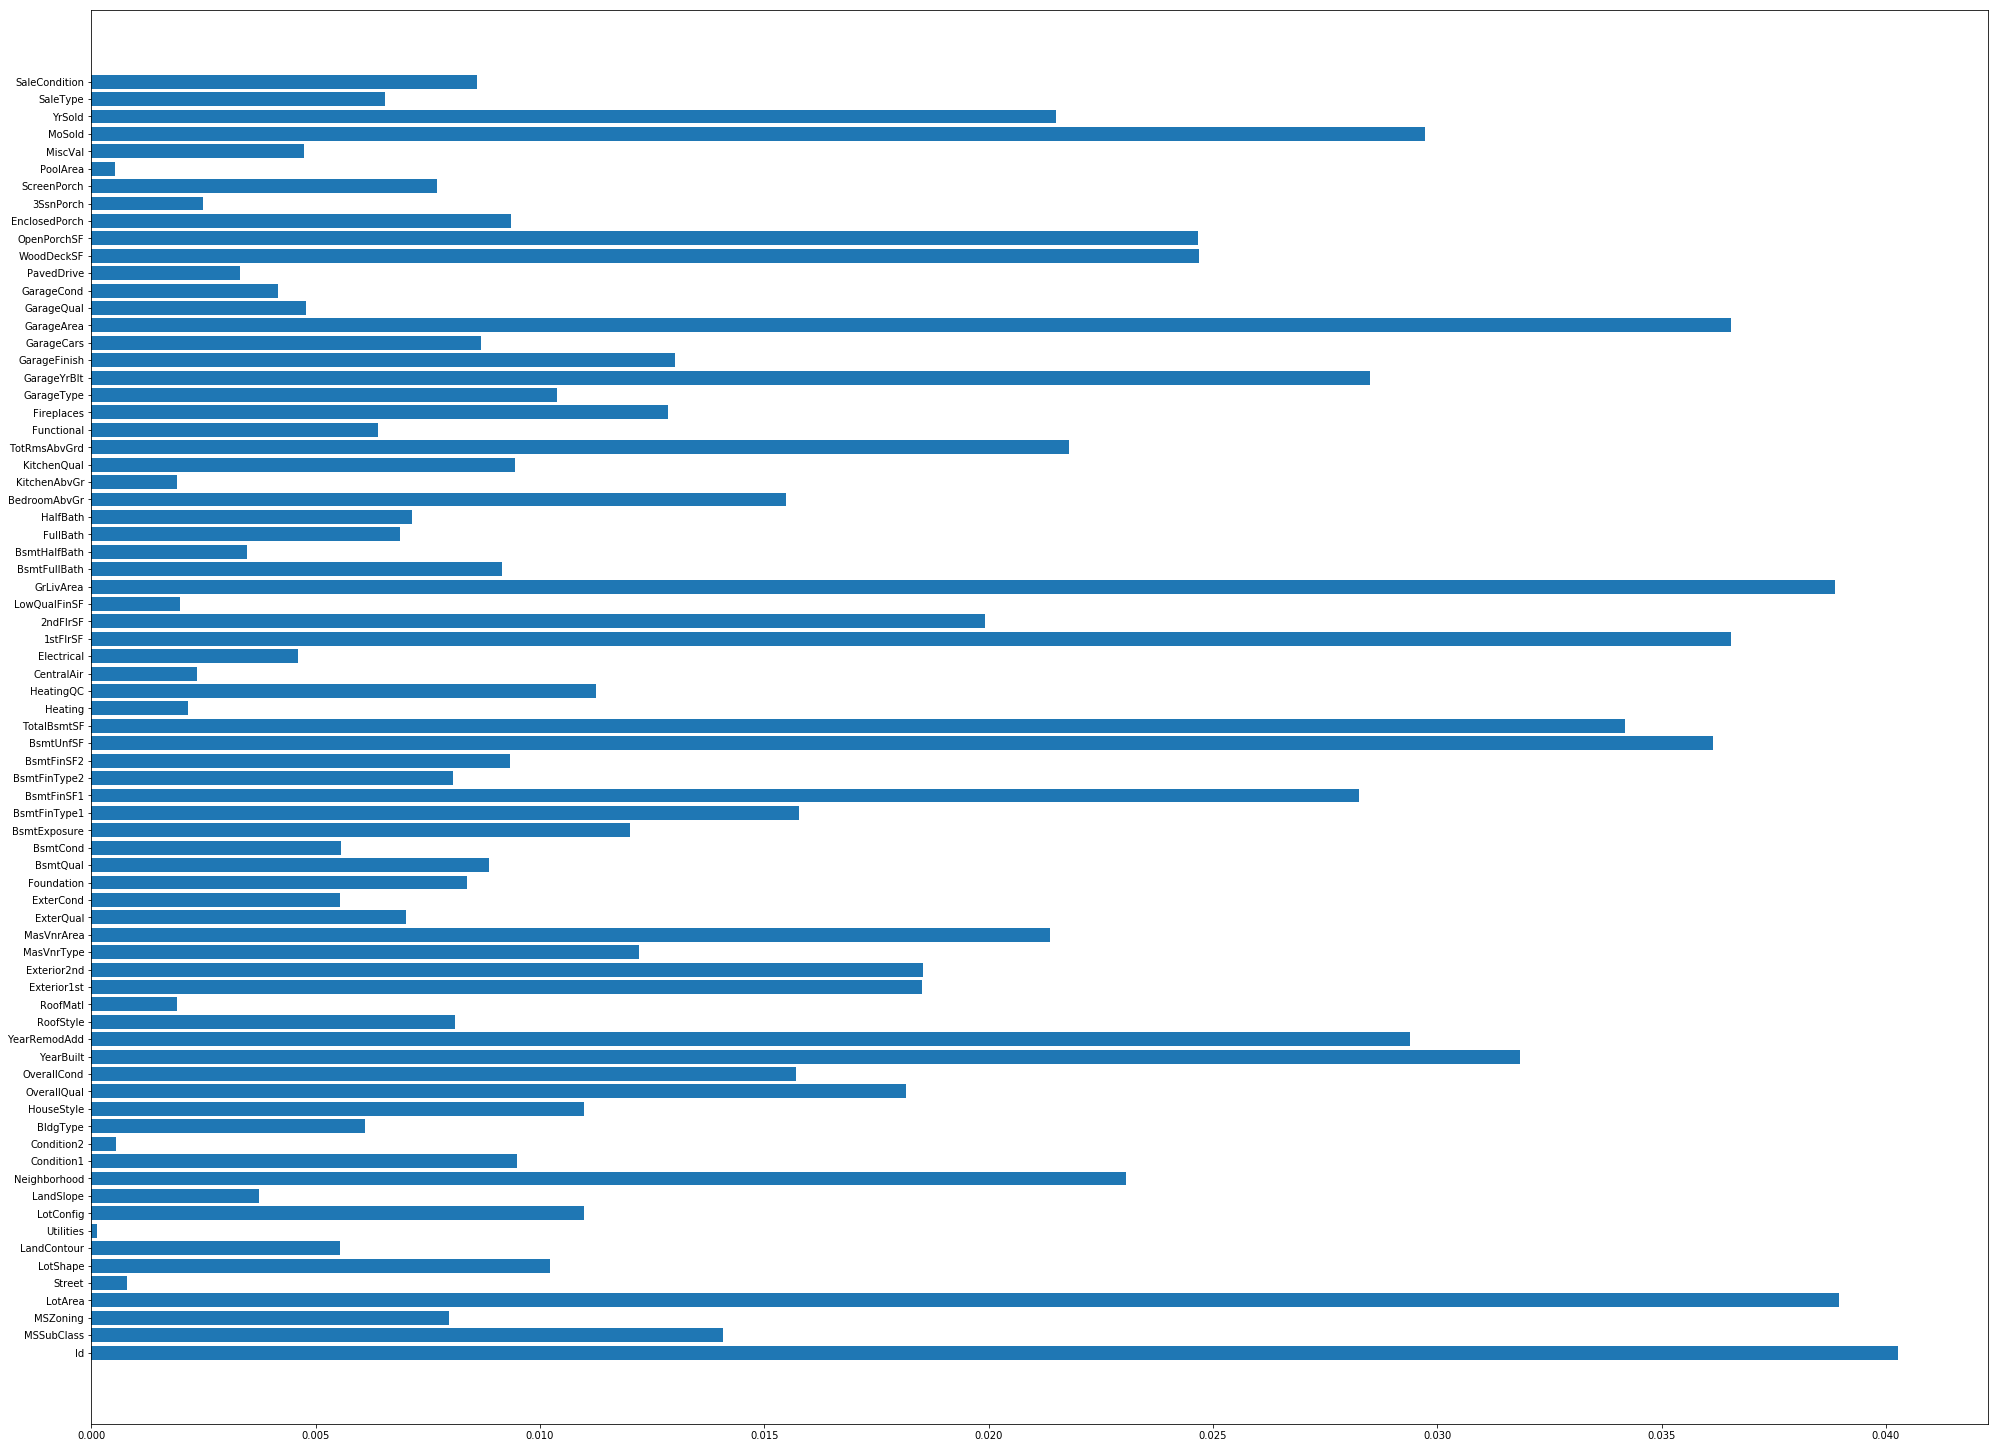

In [16]:
# 特徴量の重要度をグラフに出力
n_features = len(X.columns)
plt.figure(figsize=(34, 26))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.show()

In [17]:
X = data.loc[:,["LotArea",'OverallQual','GrLivArea','GarageArea','TotalBsmtSF',"YearBuilt", '1stFlrSF']]
X.head()

,LotArea,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,1stFlrSF
0,8450,7,1710,548,856,2003,856
1,9600,6,1262,460,1262,1976,1262
2,11250,7,1786,608,920,2001,920
3,9550,7,1717,642,756,1915,961
4,14260,8,2198,836,1145,2000,1145


In [18]:
X_and_y = pd.concat([X,y], axis=1)

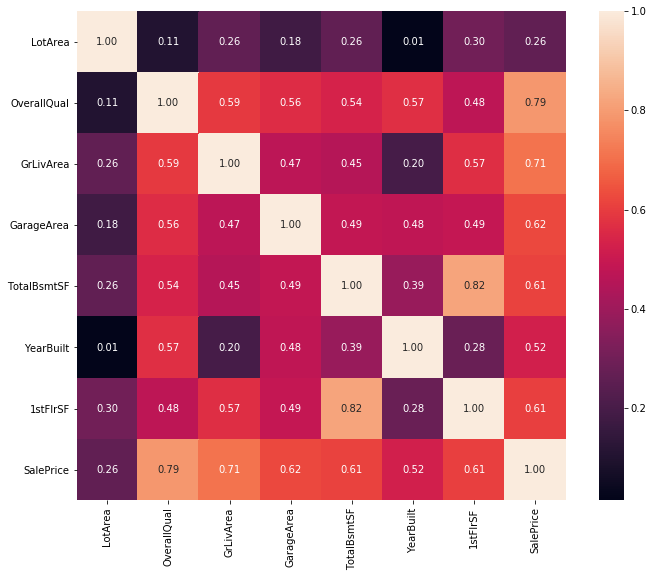

In [19]:
plt.figure(figsize=(12, 9))
sns.heatmap(X_and_y.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.loc[:,["LotArea",'OverallQual','GrLivArea','GarageArea','TotalBsmtSF',"YearBuilt", '1stFlrSF']].values.astype('float64') #今回は単純に相関係数が高い順に6つ利用して見る
y = data.loc[:, ['SalePrice']].values.astype('float64')
ss = StandardScaler()
X_std = ss.fit_transform(X) #　正規化する
y_std = ss.fit_transform(y) #　正規化する
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.3, random_state = 0) # trainと　testデータを分割

In [21]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr_std = LinearRegression() 
lr_std.fit(X_train,y_train) # 実際に学習させる。今回は線形回帰でやって見る
print(mse(y_train,lr_std.predict(X_train))**(1/2)) 
print(mse(y_test,lr_std.predict(X_test))**(1/2))
print('train RMSE:%.3f'%(mse(y_train, lr_std.predict(X_train)) ** (1/2))) # 精度評価にはRMSEを今回は使う
print('test RMSE:%.3f'%(mse(y_test, lr_std.predict(X_test)) ** (1/2)))
print(lr_std.score(X_train, y_train))
print(lr_std.score(X_test, y_test))

0.4368906727185613
0.567771931546755
train RMSE:0.437
test RMSE:0.568
0.8026480867571815
0.7005317053119873


In [23]:
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
# 2次の多項式規定を生成
quad = PolynomialFeatures(degree=2)
# 生成した基底関数で変数変換を実行
X_quad = quad.fit_transform(X_std)
X_quad

array([[ 1.        , -0.20714171,  0.65147924, ...,  1.10458794,
        -0.83389399,  0.62953718],
       [ 1.        , -0.09188637, -0.07183611, ...,  0.02456546,
         0.04030257,  0.0661212 ],
       [ 1.        ,  0.07347998,  0.65147924, ...,  0.9697371 ,
        -0.61825313,  0.39416553],
       ...,
       [ 1.        , -0.14781027,  0.65147924, ...,  1.00499084,
        -0.06582009,  0.00431077],
       [ 1.        , -0.08016039, -0.79515147, ...,  0.49618728,
         0.15425207,  0.04795306],
       [ 1.        , -0.05811155, -0.79515147, ...,  0.04309546,
        -0.05015788,  0.05837766]])

In [24]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)

In [25]:
# 線形回帰のインスタンスを生成
model_quad = LinearRegression()

# 変換後の変数を利用して実行
model_quad.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(model_quad.score(X_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_quad.score(X_quad_test, y_test), len(y_test), 2))
print('')

model_quad
train: 0.862
test : 0.829



In [27]:
# 3次関数の変数変換

# 3次の多項式規定を生成
cubic = PolynomialFeatures(degree=3)
# 生成した基底関数で変数変換を実行
X_cubic = cubic.fit_transform(X_std)
X_cubic

array([[ 1.00000000e+00, -2.07141708e-01,  6.51479243e-01, ...,
        -8.76417403e-01,  6.61639671e-01, -4.99496076e-01],
       [ 1.00000000e+00, -9.18863723e-02, -7.18361143e-02, ...,
         6.31677194e-03,  1.03634211e-02,  1.70024339e-02],
       [ 1.00000000e+00,  7.34799786e-02,  6.51479243e-01, ...,
        -6.08826195e-01,  3.88155412e-01, -2.47467381e-01],
       ...,
       [ 1.00000000e+00, -1.47810266e-01,  6.51479243e-01, ...,
         6.59841393e-02, -4.32151429e-03,  2.83029922e-04],
       [ 1.00000000e+00, -8.01603947e-02, -7.95151472e-01, ...,
        -1.08656023e-01, -3.37784072e-02, -1.05008518e-02],
       [ 1.00000000e+00, -5.81115479e-02, -7.95151472e-01, ...,
         1.04124976e-02, -1.21188803e-02,  1.41049020e-02]])

In [28]:
# ホールド・アウト法による分割
X_cubic_train,X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)

In [29]:
# 線形回帰のインスタンスを生成
model_cubic = LinearRegression()

# 変換後の変数を利用して実行
model_cubic.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# 3次関数
print('model_cubic')
print('train: %.3f' % adjusted(model_cubic.score(X_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic.score(X_cubic_test, y_test), len(y_test), 3))

model_cubic
train: 0.914
test : -12.908


In [31]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=30) 

In [32]:
model_ridge.fit(X_cubic_train,y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
print(model_ridge.score(X_cubic_test, y_test))

-3.459192390579446


In [34]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=2000)

In [35]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=2000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
model_lasso.score(X_test, y_test)

-0.0001836352662603069

In [37]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.15, l1_ratio=0.55)

In [38]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.15, copy_X=True, fit_intercept=True, l1_ratio=0.55,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
en.score(X_test, y_test)

0.7101023241290149